### Objective:
- Analyze transaction and customer data to identify trends and inconsistencies. 
- Develop metrics and examine sales drivers to gain insights into overall sales performance. 
- Identify customer segments based on purchasing behavior.
- Create visualizations and prepare findings to formulate a clear recommendations.

### Examining Transaction Data

In [ ]:
import pandas as pd

# loading transaction dataset
transactions = pd.read_excel(r"D:\projects\RetailTrialImpactAnalysis\1st_Sprint\transaction_data.xlsx", sheet_name="in")
transactions.sample(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
255844,2019-05-26,235,235272,238299,51,Doritos Mexicana 170g,2,8.8
132228,2019-03-25,222,222187,222559,70,Tyrrells Crisps Lightly Salted 165g,2,8.4
20478,2018-12-02,110,110084,112173,52,Grain Waves Sour Cream&Chives 210G,2,7.2
107804,2018-09-19,114,114137,117716,55,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,2,3.4
174136,2019-05-28,41,41469,38451,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8
8172,2018-11-17,67,67167,64810,111,Smiths Chip Thinly Cut Original 175g,2,6.0
8108,2018-12-12,65,65326,63011,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6
211737,2018-10-20,157,157168,159461,70,Tyrrells Crisps Lightly Salted 165g,2,8.4
204150,2019-05-16,93,93217,92086,97,RRD Salt & Vinegar 165g,4,12.0
233445,2018-07-31,137,137249,140391,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2


In [3]:
# define function for examining the data frame to avoid redundancy 
def analyze_df(df, show_nulls=True, show_duplicates=True, show_dtypes=True):
    
    if not isinstance(df, pd.DataFrame):
        print("invalid: the input must be a pandas DataFrame.")
        return False
    
    result = {}
    
    if show_nulls:
        nulls = df.isnull().sum()
        result['Null Counts'] = {
            'Total Nulls': nulls.sum(),
            'Nulls by Column': nulls
        }
    
    if show_duplicates:
        result['Duplicates'] = {
            'Total Duplicate Rows': df.duplicated().sum(),
            'Total Duplicate Columns': df.T.duplicated().sum()
        }
    
    if show_dtypes:
        result['Data Types'] = df.dtypes
    
    # print the result
    print(f"Analysis for DataFrame ({len(df)} rows, {len(df.columns)} columns)")
    print("=" * 60)
    
    for section, data in result.items():
        print(f"\n{section}:")
        print("-" * 40)
        if isinstance(data, dict):
            for k, v in data.items():
                print(f"{k}:")
                print(v.to_string() if hasattr(v, 'to_string') else v)
        else:
            print(data.to_string())
    
    return
    

In [4]:
# renaming columns
transactions.columns = [
    'Date', 'StoreNumber', 'LoyalityCardNumber', 'TransactionID', 
    'ProductNumber', 'ProductName', 'ProductQuantity', 'TotalSales'
]

# examining data types and check for missing values
analyze_df(transactions, show_duplicates=False)

Analysis for DataFrame (264836 rows, 8 columns)

Null Counts:
----------------------------------------
Total Nulls:
0
Nulls by Column:
Date                  0
StoreNumber           0
LoyalityCardNumber    0
TransactionID         0
ProductNumber         0
ProductName           0
ProductQuantity       0
TotalSales            0

Data Types:
----------------------------------------
Date                  datetime64[ns]
StoreNumber                    int64
LoyalityCardNumber             int64
TransactionID                  int64
ProductNumber                  int64
ProductName                   object
ProductQuantity                int64
TotalSales                   float64


In [5]:
# examine quantity and sales to ensure integrity
transactions[['ProductQuantity', 'TotalSales']].describe()

,ProductQuantity,TotalSales
count,264836.000000,264836.000000
mean,1.907309,7.304200
std,0.643654,3.083226
min,1.000000,1.500000
25%,2.000000,5.400000
50%,2.000000,7.400000
75%,2.000000,9.200000
max,200.000000,650.000000


In [6]:
# implement a function to measure Coefficient of Variation(CV) to check extreme variability.
def cv(col):
    col_cv = col.std() / col.mean() * 100
    result = ''
    if col_cv < 30:
        result = f"Low variability for '{col.name}' column, Data points are tightly clustered."
    elif col_cv > 30 and col_cv < 100:
        result = f"Moderate variability for '{col.name}' column, but data still within expected range."
    else:
        result = f"Extreme variability for '{col.name}' column. Check for potential outliers or errors"
    return result

print(cv(transactions['ProductQuantity']), '\n')
print(cv(transactions['TotalSales']))

Moderate variability for 'ProductQuantity' column, but data still within expected range. 

Moderate variability for 'TotalSales' column, but data still within expected range.


In [7]:
# check for dublicates
print("\nNumber of duplicated rows:")
print(transactions.duplicated().sum())



Number of duplicated rows:
1


In [8]:
# drop the duplicated row
transactions.drop_duplicates(inplace=True)

### Examine Customer Data

In [9]:
# load purchace data as CSV
purchaseBehaviour = pd.read_csv(r"D:\projects\RetailTrialImpactAnalysis\1st_Sprint\purchase_behaviour.csv")
purchaseBehaviour.sample(10)


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
40632,152079,YOUNG SINGLES/COUPLES,Mainstream
9099,34017,YOUNG SINGLES/COUPLES,Mainstream
55984,210365,YOUNG SINGLES/COUPLES,Mainstream
63741,239068,RETIREES,Premium
29954,110112,YOUNG SINGLES/COUPLES,Budget
17873,65249,OLDER FAMILIES,Premium
7226,26095,YOUNG SINGLES/COUPLES,Mainstream
44496,167202,RETIREES,Budget
60067,226375,YOUNG SINGLES/COUPLES,Budget
47697,178229,RETIREES,Budget


In [10]:
# ranaming columns 
purchaseBehaviour.columns = [
    'LoyalityCardNumber', 'LifeStage', 'PremiumCustomer'
]

# examining data types and check for missing values
analyze_df(purchaseBehaviour, show_duplicates=False)

Analysis for DataFrame (72637 rows, 3 columns)

Null Counts:
----------------------------------------
Total Nulls:
0
Nulls by Column:
LoyalityCardNumber    0
LifeStage             0
PremiumCustomer       0

Data Types:
----------------------------------------
LoyalityCardNumber     int64
LifeStage             object
PremiumCustomer       object


In [11]:
# check for dublicates
print("\nNumber of duplicated rows:")
print(purchaseBehaviour.duplicated().sum())



Number of duplicated rows:
0


In [12]:
# checking unique values for categorical columns
print('LifeStage column unique values:\n', purchaseBehaviour['LifeStage'].unique(), '\n')
print('PremiumCustomer column unique values:\n', purchaseBehaviour['PremiumCustomer'].unique())

LifeStage column unique values:
 ['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES'] 

PremiumCustomer column unique values:
 ['Premium' 'Mainstream' 'Budget']


In [13]:
# splitting 'LifeStage' into 'AgeGroup' and 'SocialStatus' to allow easy analyze trends purely based on the age group and martial status
split_data = purchaseBehaviour['LifeStage'].str.split(' ', expand=True, n=1)
purchaseBehaviour['AgeGroup'] = split_data[0]
purchaseBehaviour['SocialStatus'] = split_data[1]
#purchaseBehaviour.drop(columns=['LifeStage'], inplace=True)

# ensure data splitted as intended
purchaseBehaviour.head()

,LoyalityCardNumber,LifeStage,PremiumCustomer,AgeGroup,SocialStatus
0,1000,YOUNG SINGLES/COUPLES,Premium,YOUNG,SINGLES/COUPLES
1,1002,YOUNG SINGLES/COUPLES,Mainstream,YOUNG,SINGLES/COUPLES
2,1003,YOUNG FAMILIES,Budget,YOUNG,FAMILIES
3,1004,OLDER SINGLES/COUPLES,Mainstream,OLDER,SINGLES/COUPLES
4,1005,MIDAGE SINGLES/COUPLES,Mainstream,MIDAGE,SINGLES/COUPLES


### Merging Transaction & Customer Data

In [14]:
# identify Common columns for merging
print("Transaction Columns:", transactions.columns)
print("Customer Columns:", purchaseBehaviour.columns)

Transaction Columns: Index(['Date', 'StoreNumber', 'LoyalityCardNumber', 'TransactionID',
       'ProductNumber', 'ProductName', 'ProductQuantity', 'TotalSales'],
      dtype='object')
Customer Columns: Index(['LoyalityCardNumber', 'LifeStage', 'PremiumCustomer', 'AgeGroup',
       'SocialStatus'],
      dtype='object')


In [15]:
# merge using 'LoyalityCardNumber' column
# I will use 'inner' to keep only matching records
full_df = pd.merge(left=transactions, right=purchaseBehaviour, on='LoyalityCardNumber', how='inner')

In [16]:
# verify the merge step
print(full_df.info())
print(full_df.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264835 entries, 0 to 264834
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                264835 non-null  datetime64[ns]
 1   StoreNumber         264835 non-null  int64         
 2   LoyalityCardNumber  264835 non-null  int64         
 3   TransactionID       264835 non-null  int64         
 4   ProductNumber       264835 non-null  int64         
 5   ProductName         264835 non-null  object        
 6   ProductQuantity     264835 non-null  int64         
 7   TotalSales          264835 non-null  float64       
 8   LifeStage           264835 non-null  object        
 9   PremiumCustomer     264835 non-null  object        
 10  AgeGroup            264835 non-null  object        
 11  SocialStatus        215072 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 24.2+ MB
None
    

#### Note on SocialStatus Nulls
Null values in the *SocialStatus* column are a consequence of the splitting operation. This occurs for original *LifeStage* value (*RETIREES*) that comprise a single word, leaving no second component to accomodate the *SocialStatus* field.

In [17]:
# inspecting the nulls
full_df[full_df['SocialStatus'].isnull()][['AgeGroup', 'SocialStatus']].sample(5)

# fill the nulls with 'No-status'
full_df['SocialStatus'].fillna('No_STATUS', inplace=True)

# check null counts again
full_df.isnull().sum()

Date                  0
StoreNumber           0
LoyalityCardNumber    0
TransactionID         0
ProductNumber         0
ProductName           0
ProductQuantity       0
TotalSales            0
LifeStage             0
PremiumCustomer       0
AgeGroup              0
SocialStatus          0
dtype: int64

### Analysis & Customer Segments

In [18]:
full_df.head()

,Date,StoreNumber,LoyalityCardNumber,TransactionID,ProductNumber,ProductName,ProductQuantity,TotalSales,LifeStage,PremiumCustomer,AgeGroup,SocialStatus
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,YOUNG,SINGLES/COUPLES
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,MIDAGE,SINGLES/COUPLES
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,MIDAGE,SINGLES/COUPLES
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,MIDAGE,SINGLES/COUPLES
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,MIDAGE,SINGLES/COUPLES


In [19]:
# define Key Metrics
totalSales = full_df['TotalSales'].sum()
totalCustomers = full_df['LoyalityCardNumber'].nunique()
transactionsPerCustomer = full_df.groupby('LoyalityCardNumber')['TransactionID'].count().mean()

print(f"Total Sales: ${totalSales:,.2f}")
print(f"Total Unique Customers: {totalCustomers}")
print(f"Avg Transactions per Customer: {transactionsPerCustomer:.2f}")

Total Sales: $1,934,409.00
Total Unique Customers: 72637
Avg Transactions per Customer: 3.65


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\mokha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mokha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


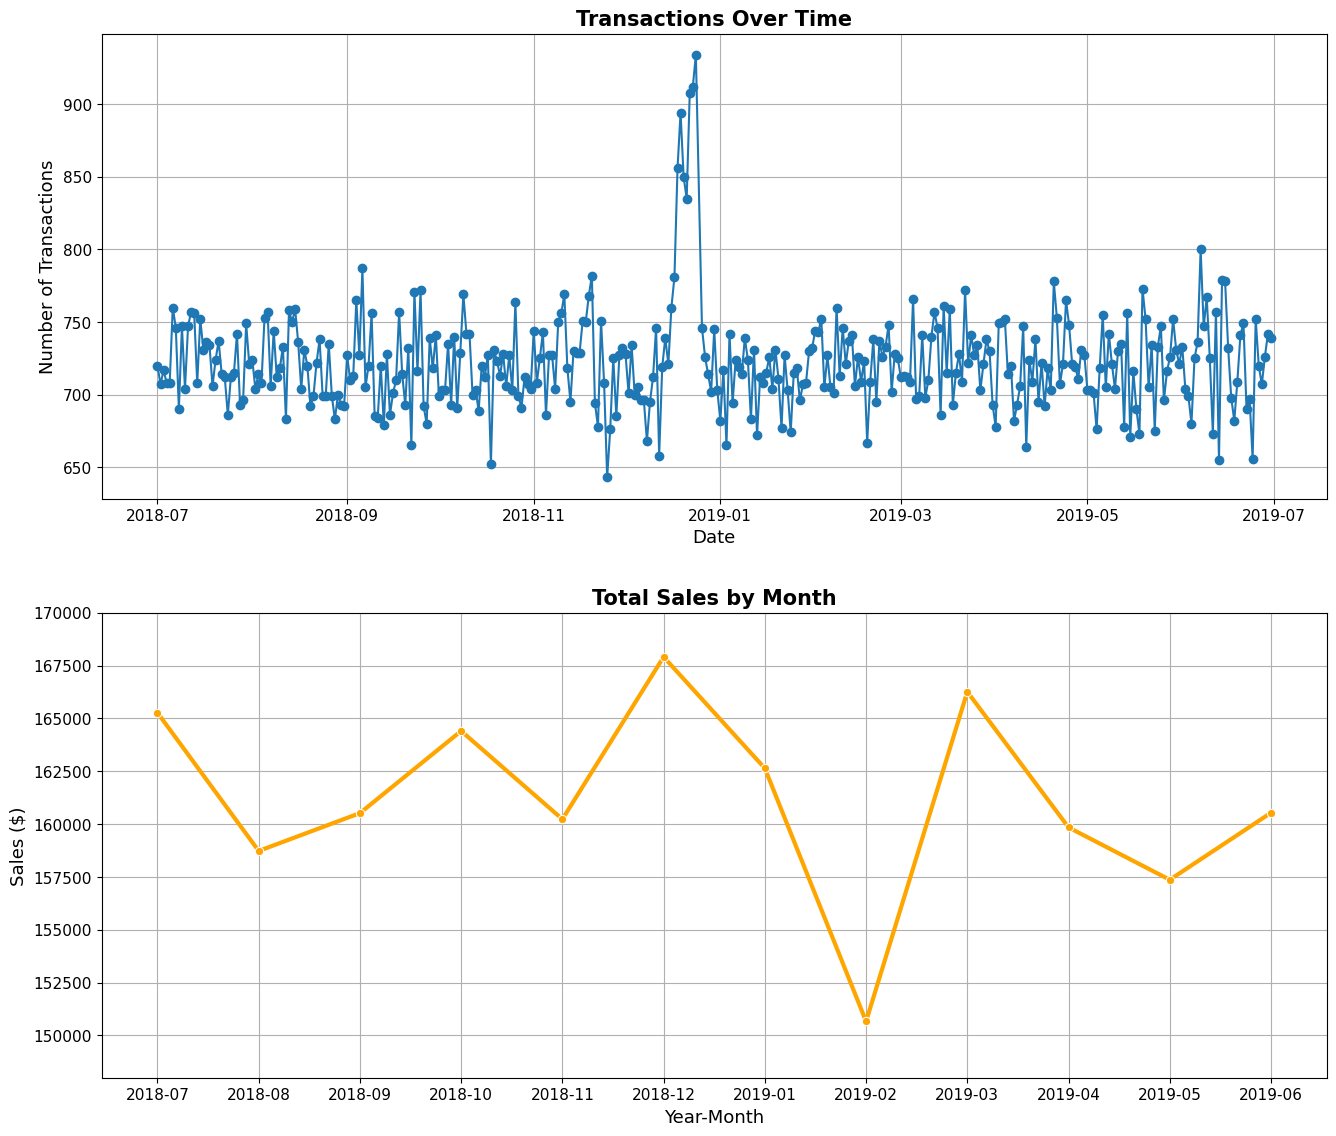

In [21]:
# analyze Sales Drivers (Time of Year)
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# plotting Transactions Over Time
transactions_over_time = full_df.groupby('Date')['TransactionID'].nunique()
axes[0].plot(transactions_over_time.index, transactions_over_time.values, marker='o')
axes[0].set_title('Transactions Over Time', fontsize=15, fontweight='bold')
axes[0].set_xlabel('Date', fontsize=13)
axes[0].set_ylabel('Number of Transactions', fontsize=13)
axes[0].tick_params(axis='both', labelsize=11)
axes[0].grid(True)

# plotting Total Sales by Month
monthlySales = (
    full_df.groupby(full_df['Date'].dt.to_period('M').astype(str).rename('yearMonth'))
    ['TotalSales'].sum().reset_index()
    )
sns.lineplot(data=monthlySales, x='yearMonth', y='TotalSales', color='orange', marker='o', ax=axes[1], linewidth=3)
axes[1].set_title("Total Sales by Month", fontsize=15, fontweight='bold')
axes[1].set_xlabel('Year-Month', fontsize=13)
axes[1].set_ylabel('Sales ($)', fontsize=13)
axes[1].set_ylim([148000, 170000])
axes[1].tick_params(axis='both', labelsize=11)
axes[1].grid(True)

plt.tight_layout(pad=3)
plt.show()

**Transactions Over Time:**
- The number of transactions generally fluctuated between 650 and 775 from July 2018 to mid-December 2018 and from January 2019 to July 2019.
- There is a noticeable increase around late December 2018, which may be due to preparations for the New Year., with transaction numbers exceeding 900.


**Total Sales by Month:**
- Monthly sales typically ranged from $150,000 to $170,000.
- Peak sales months were November 2018 (around $167,500) and March 2019 (around $166,00).
- The lowest sales month was February 2019, dropping to just over $150,000.


**Relationship between Charts:**
- The spike in transaction count in late December 2018 did not align with the absolute highest sales month, which occurred in November 2018. This suggests that the high transaction volume during the spike period might have involved cheaper transactions on average compared to other periods.

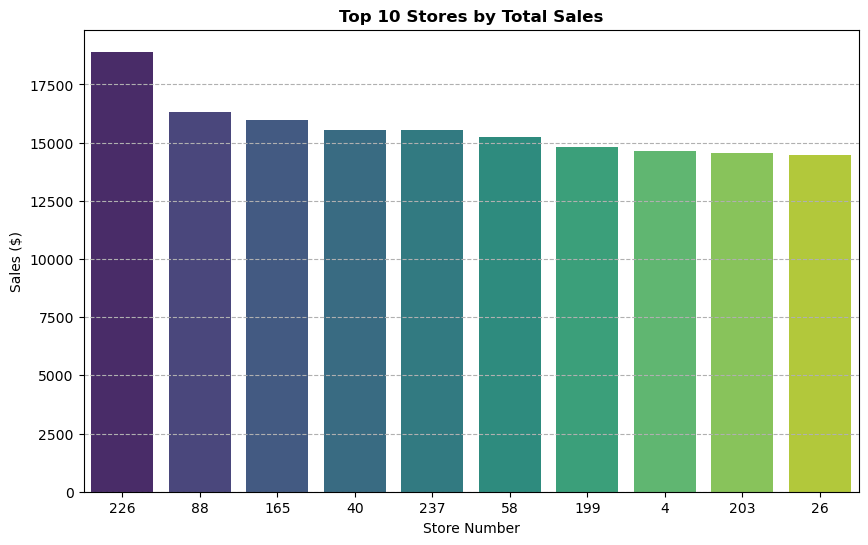

In [22]:
# analyze Sales Drivers (Store Number)
salesByStore = full_df.groupby('StoreNumber')['TotalSales'].sum().sort_values(ascending=False).reset_index()
top10Stores = salesByStore.head(10)
storesOrdered = top10Stores['StoreNumber'].tolist()
plt.figure(figsize=(10,6))
sns.barplot(data=top10Stores, x='StoreNumber', y='TotalSales', order=storesOrdered, palette='viridis')
plt.title('Top 10 Stores by Total Sales', fontweight='bold')
plt.xlabel('Store Number')
plt.ylabel('Sales ($)')
plt.grid(True, axis='y', linestyle='--')
plt.show()

**Leading Performer:** Store 226 stands out as the highest performing store, achieving total sales exceeding $18,000, which is a significantly larger amount than the second highest store. 

**Top Tier:** The top six stores (226, 88, 165, 40, 237, 58) achieved sales exceeding $15,000. 

Consistent performance within the top 10 stores: The sales figures of the top 10 stores range from about $14,500 to just over $18,000.

In [23]:
# analyze Sales Drivers (Brand Name)
full_df['brandName'] = full_df['ProductName'].str.split().str[0]
full_df['brandName'] = full_df['brandName'].str.lower()
full_df['brandName'].unique()

array(['natural', 'ccs', 'ww', 'smiths', 'kettle', 'old', 'tyrrells',
       'dorito', 'doritos', 'infuzions', 'grain', 'thins', 'red',
       'grnwves', 'tostitos', 'pringles', 'cobs', 'twisties', 'rrd',
       'infzns', 'burger', 'ncc', 'cheezels', 'smith', 'woolworths',
       'french', 'sunbites', 'cheetos', 'snbts'], dtype=object)

In [24]:
# fix some brand names like (dorito -> doritos)
correctNames = {
    'dorito': 'doritos',
    'snbts': 'sunbites',
    'red': 'rrd',
    'infzns': 'infuzions',
    'smith': 'smith\'s',
    'smiths': 'smith\'s'
}
full_df['brandName'].replace(correctNames, inplace=True)
full_df['brandName'] = full_df['brandName'].str.upper()
full_df['brandName'].unique()

array(['NATURAL', 'CCS', 'WW', "SMITH'S", 'KETTLE', 'OLD', 'TYRRELLS',
       'DORITOS', 'INFUZIONS', 'GRAIN', 'THINS', 'RRD', 'GRNWVES',
       'TOSTITOS', 'PRINGLES', 'COBS', 'TWISTIES', 'BURGER', 'NCC',
       'CHEEZELS', 'WOOLWORTHS', 'FRENCH', 'SUNBITES', 'CHEETOS'],
      dtype=object)

<Figure size 1200x1000 with 0 Axes>

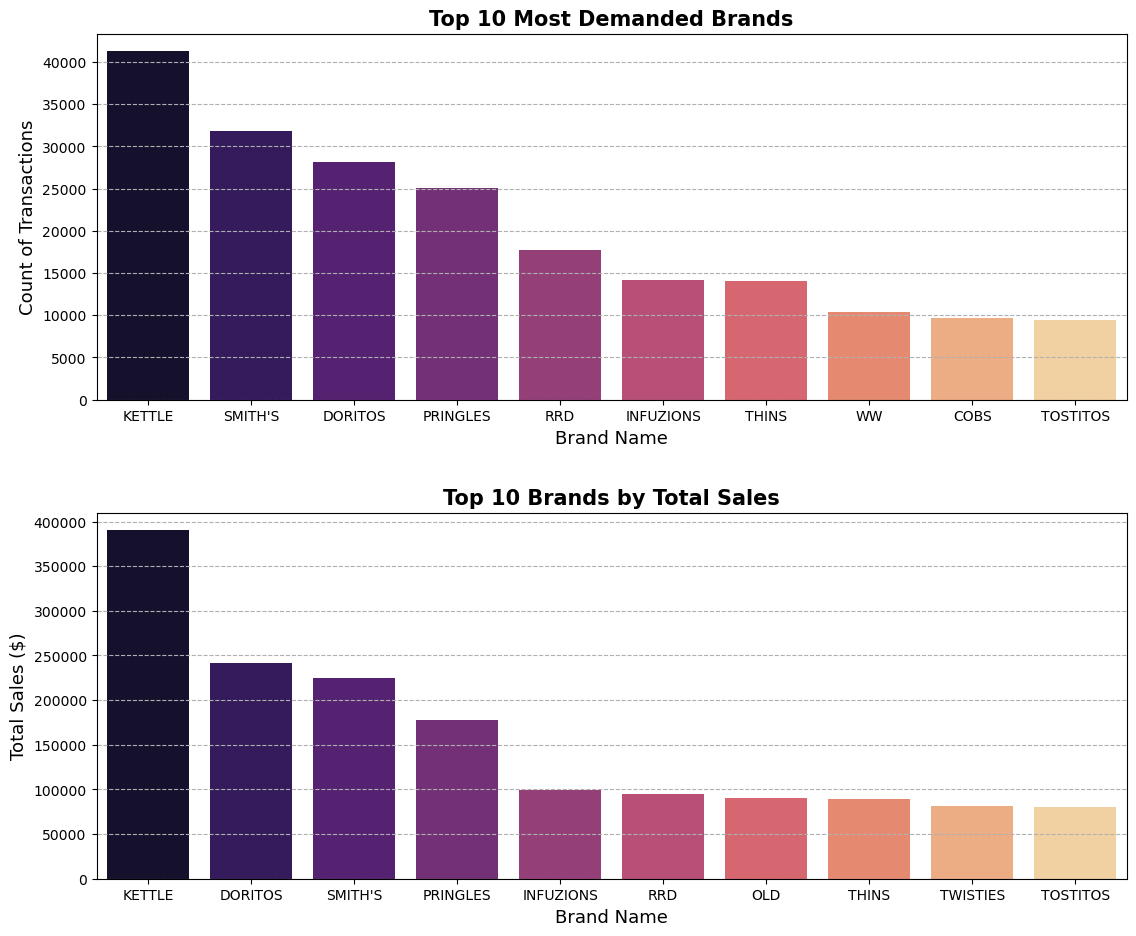

In [25]:
# Visualize top 10 brands based on demand and sales
plt.figure(figsize=(12, 10))  # Single consistent figure size
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# plotting Brand Demand
brandDemand = full_df.groupby('brandName')['TransactionID'].count().sort_values(ascending=False).head(10).reset_index()
brandDemand.rename(columns={'brandName': 'Brand', 'TransactionID': 'Demand'}, inplace=True)
sns.barplot(data=brandDemand, x='Brand', y='Demand', palette='magma', ax=axes[0])
axes[0].set_title('Top 10 Most Demanded Brands', fontsize=15, fontweight='bold')  # Fixed typo in title
axes[0].set_ylabel('Count of Transactions', fontsize=13)
axes[0].set_xlabel('Brand Name', fontsize=13)
axes[0].tick_params(axis='x')
axes[0].grid(True, axis='y', linestyle='--')

# plotting Brand Total Sales
brandTotalSales = full_df.groupby('brandName')['TotalSales'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=brandTotalSales, x='brandName', y='TotalSales', palette='magma', ax=axes[1])
axes[1].set_title('Top 10 Brands by Total Sales', fontsize=15, fontweight='bold')
axes[1].set_ylabel('Total Sales ($)', fontsize=13)  # Added currency indicator
axes[1].set_xlabel('Brand Name', fontsize=13)
axes[1].tick_params(axis='x')
axes[1].grid(True, axis='y', linestyle='--')

plt.tight_layout(pad=3)
plt.show()

**Kettle**, **Smith's**, and **Doritos** appear in both top 10 lists, indicating they are market leaders in both customer demand and revenue generation.

**Kettle** is the leading brand in both metrics, which indicates it's strong brand loyality and sales volumes.

**Doritos** ranks higher in sales than in transactions, implying their products might have premium pricing compared to competitors like **Smith's** (that has more transactions but lower total sales).

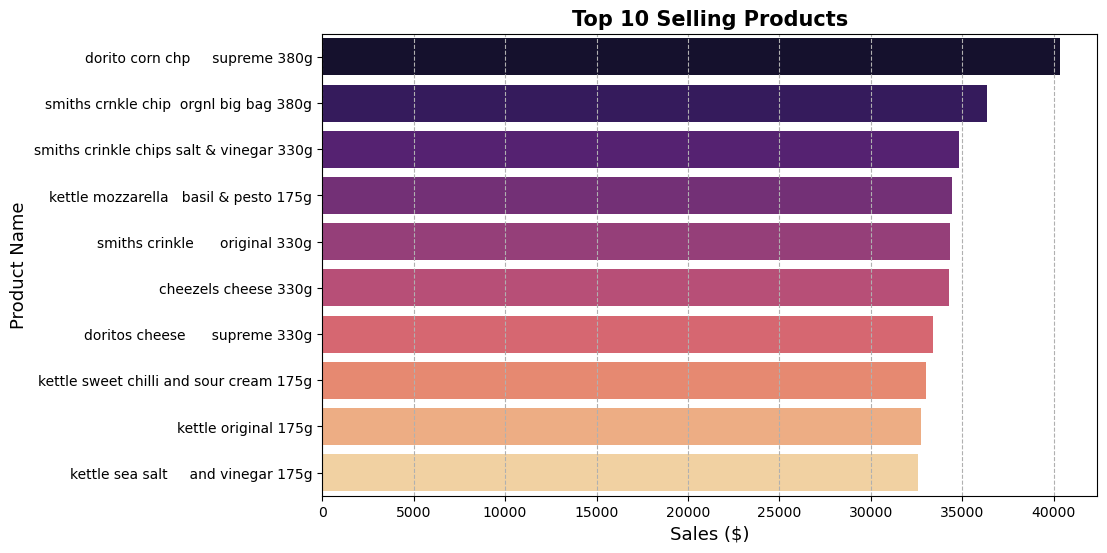

In [26]:
# analyze Sales Drivers (Product Type)
full_df['ProductName'] = full_df['ProductName'].str.strip().str.lower()
productSales = full_df.groupby('ProductName')['TotalSales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=productSales, x='TotalSales', y='ProductName', palette='magma')
plt.title('Top 10 Selling Products', fontsize=15, fontweight='bold')
plt.xlabel('Sales ($)', fontsize=13)
plt.ylabel('Product Name', fontsize=13)
plt.grid(True, axis='x', linestyle='--')
plt.show()

**"dorito corn chp supreme 380g"** is the clear best selling product, the thing that may suggests exceptional consumer preference or good marketing for the product.

**"smiths crmkle chip orgnl big bag 380g"** hold a strong second place.

There's a clear gap between the top two products and the rest of the top 10.
Products from the 3rd to the 8th position have relatively similar sales range, mostly ranging between $32,500 and $35,000.

### Analysis on Customer Segments

I am interested to investegate the followings:
- Who spends the most on chips
- How many customers are in each segment 
- How many chips are bought per customer by segment
- What’s the average chip price by customer segment

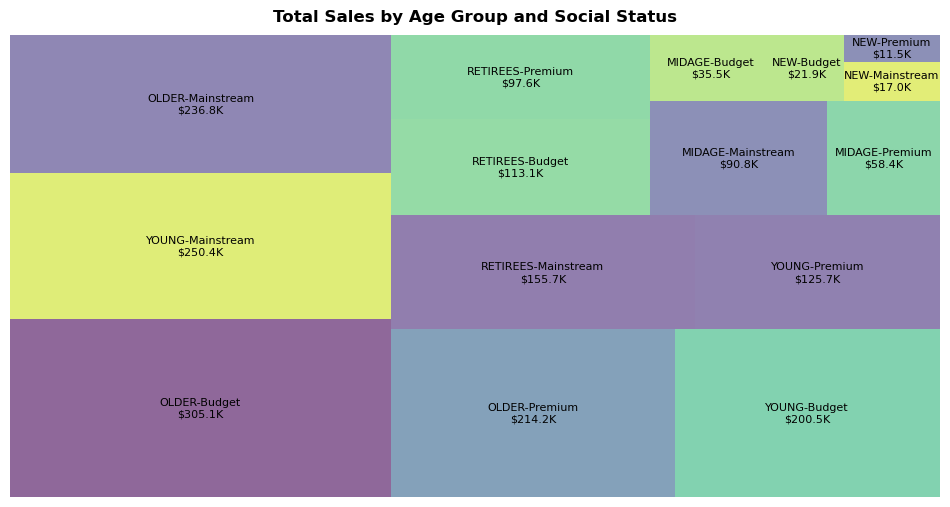

In [27]:
import squarify
spendingSegments = full_df.groupby(['AgeGroup', 'PremiumCustomer'])['TotalSales'].sum().sort_values(ascending=False).reset_index()
spendingSegments['label'] = spendingSegments.apply(
    lambda x : f"{x['AgeGroup']}-{x['PremiumCustomer']}\n${x['TotalSales']/1000:.1f}K", axis=1
)

plt.figure(figsize=(12, 6))
squarify.plot(sizes=spendingSegments['TotalSales'], label=spendingSegments['label'], alpha=.6, text_kwargs={'fontsize':8})
plt.title('Total Sales by Age Group and Social Status', fontweight='bold', pad=10)
plt.axis('off')
plt.show()

**Sales are coming mainly from Budget-older, Mainstream-young, and Mainstream-older**. Let's check if the higher sales are due to there being more customers who buy chips.

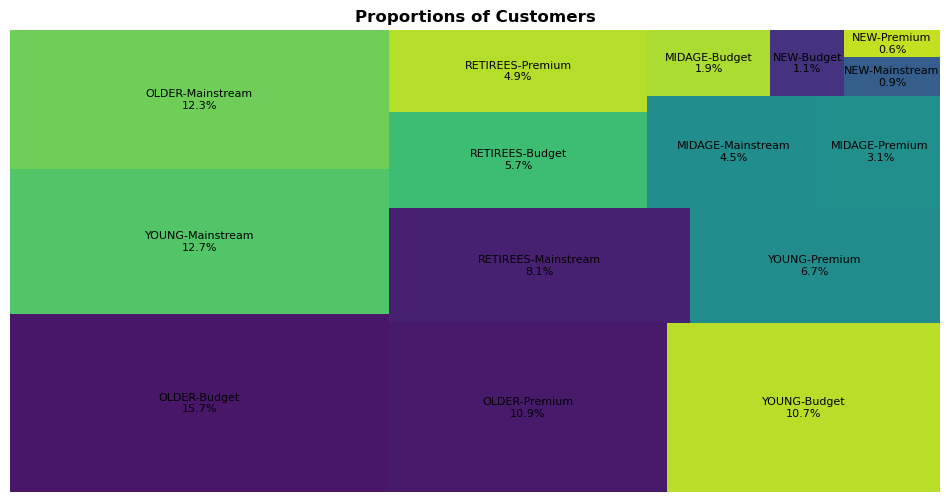

In [28]:
customerSegments=full_df.groupby(['AgeGroup', 'PremiumCustomer']).agg(
    TransactionsCount=('TransactionID', 'count')
    ).sort_values(by='TransactionsCount', ascending=False).reset_index()

customerSegments['label']=customerSegments.apply(
    lambda x : f"{x['AgeGroup']}-{x['PremiumCustomer']}\n{x['TransactionsCount']/customerSegments['TransactionsCount'].sum():.1%}",
    axis=1
)
plt.figure(figsize=(12, 6))
squarify.plot(
    sizes=customerSegments['TransactionsCount'], 
    label=customerSegments['label'],
    text_kwargs={'fontsize':8}
)
plt.title('Proportions of Customers', fontweight='bold')
plt.axis('off')
plt.show()

**There are more Budget-Older and Mainstream-young who buy chips.** This cotributes to there being more sales to these customer segments.

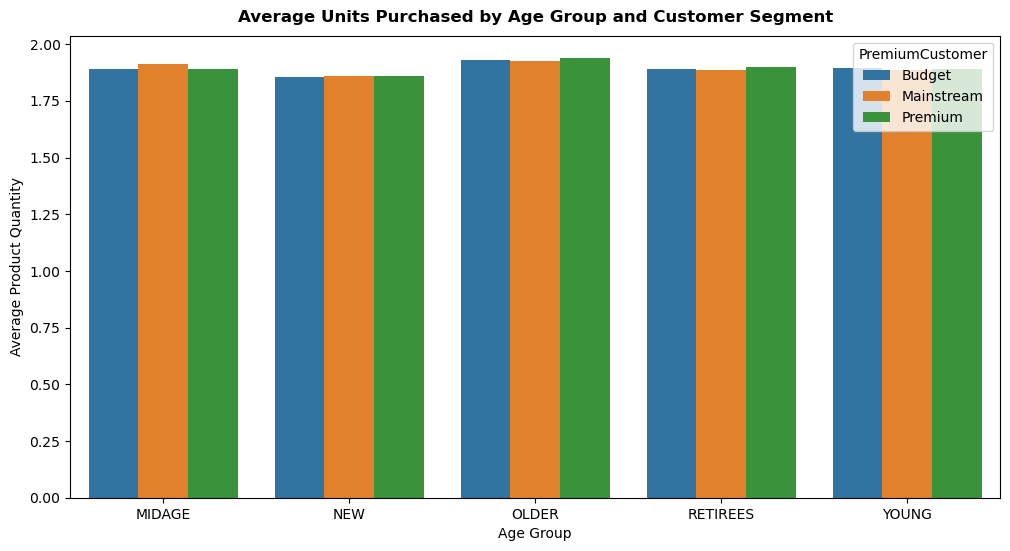

In [29]:
# plot for Average unites bought per customer Segments
avgUnits=full_df.groupby(['AgeGroup', 'PremiumCustomer'])['ProductQuantity'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=avgUnits,
    x='AgeGroup',
    y='ProductQuantity',
    hue='PremiumCustomer',
)

plt.title('Average Units Purchased by Age Group and Customer Segment', fontweight='bold', pad=10)
plt.xlabel('Age Group')
plt.ylabel('Average Product Quantity')
plt.show()

The difference Average Units Purchased by Age Group and Customer Segment isn’t large, let's check if this difference is statistically different. I will comparing means across multiple groups so **ANOVA** is a suitable test.

In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

full_df['AgeGroup'] = full_df['AgeGroup'].astype('category')
full_df['PremiumCustomer'] = full_df['PremiumCustomer'].astype('category')

model = ols('ProductQuantity ~ C(AgeGroup) + C(PremiumCustomer) + C(AgeGroup):C(PremiumCustomer)', data=full_df).fit()
results = sm.stats.anova_lm(model, typ=2)
results

,sum_sq,df,F,PR(>F)
C(AgeGroup),114.263045,4.0,69.026473,1.653226e-58
C(PremiumCustomer),1.727509,2.0,2.087182,1.240383e-01
C(AgeGroup):C(PremiumCustomer),6.615746,8.0,1.998291,4.258056e-02
Residual,109592.517581,264820.0,NaN,NaN


**AgeGroup:**
- p-value is extemely small (<< 0.0001) 
- Effect size is large (114.26))

**PremiumCustomer:**
- p-value equals 0.124 which is large (>0.05)

**Interaction Effect:**
- p-value equals 0.043, so the effect of age group on purchase quantity depends slightly on customer segment.

**Age groups drive the strongest differences in purchase quantity**

#### Further Analysis on Customer Segments

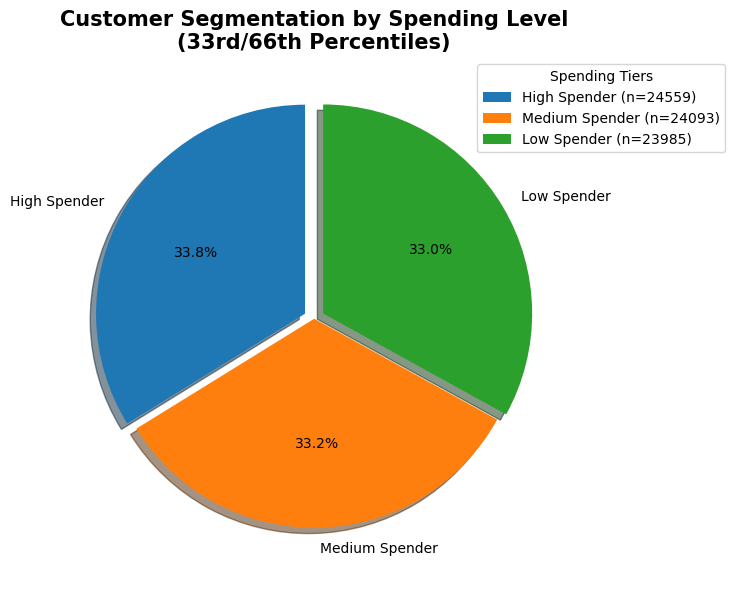

In [32]:
# Customer Spending Segments
customerSpend = full_df.groupby('LoyalityCardNumber')['TotalSales'].sum().reset_index()
quantiles = customerSpend['TotalSales'].quantile([0.33, 0.66])
low, high = quantiles.iloc[0], quantiles.iloc[1]

def segment(amount):
    if amount <= low: 
        return 'Low Spender'
    elif amount <= high:
        return 'Medium Spender'
    else:
        return 'High Spender'

customerSpend['Segment'] = customerSpend['TotalSales'].apply(segment)

plt.figure(figsize=(9, 6))
segment_counts = customerSpend['Segment'].value_counts()
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90,
        explode=(0.05, 0, 0.05), shadow=True)
plt.title('Customer Segmentation by Spending Level\n(33rd/66th Percentiles)', fontsize=15, fontweight='bold')
plt.legend(title='Spending Tiers', bbox_to_anchor=(1.3, 1),
          labels=[f'{label} (n={count})' for label, count in zip(segment_counts.index, segment_counts)])
plt.tight_layout()
plt.show()

The plot shows no dominant spending group, nearly equal proportions between segements.

### Deeping Dive into Customer Segments

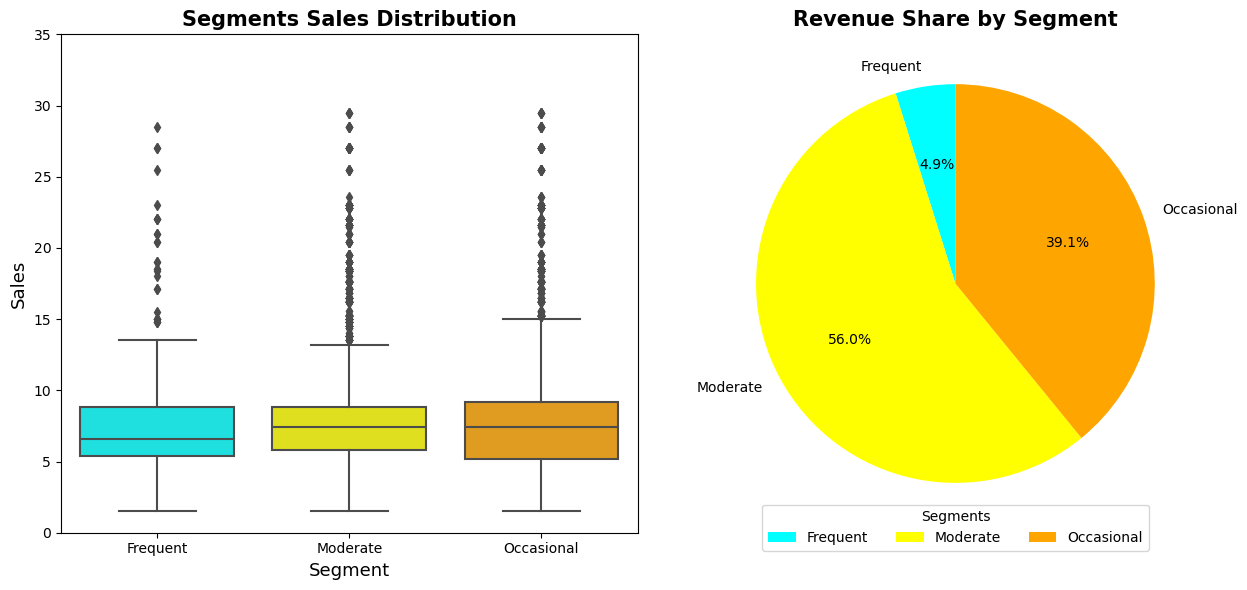

In [33]:
# defining Frequency Segments
customerTransactionCount = full_df.groupby('LoyalityCardNumber').agg(TransactionCount=('TransactionID', 'nunique')).reset_index()

def customerFreq(count):
    if count > 10:
        return 'Frequent'
    elif count > 4:
        return 'Moderate'
    else:
        return 'Occasional'

customerTransactionCount['Segment'] = customerTransactionCount['TransactionCount'].apply(customerFreq)

# merge back with original
mergedSegments = pd.merge(full_df, customerTransactionCount, how='inner', on='LoyalityCardNumber')[['LoyalityCardNumber', 'Segment', 'TotalSales']]
segmentRevenue = mergedSegments.groupby('Segment')['TotalSales'].sum().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(13,6))

segment_order = ['Frequent', 'Moderate', 'Occasional']
segment_palette = {
    'Frequent': 'aqua',
    'Moderate': 'yellow',
    'Occasional': 'orange'
}
color_list = [segment_palette[seg] for seg in segment_order]

# boxplot for sales distribution
sns.boxplot(data=mergedSegments, y='TotalSales', x='Segment', ax=axes[0],
            order=segment_order, palette=segment_palette)
axes[0].set_title('Segments Sales Distribution', fontsize=15, fontweight='bold')
axes[0].set_ylim([0, 35])
axes[0].set_ylabel('Sales', fontsize=13)
axes[0].set_xlabel('Segment', fontsize=13)

# pie chart revenue proportions for segments
axes[1].pie(segmentRevenue['TotalSales'], 
            labels=segmentRevenue['Segment'],
            startangle=90, 
            autopct='%1.1f%%',
            colors=[segment_palette[seg] for seg in segmentRevenue['Segment']])
axes[1].set_title('Revenue Share by Segment', fontsize=15, fontweight='bold')
axes[1].legend(title='Segments', ncol=3, loc='lower center', bbox_to_anchor=(0.5, -0.05))
plt.tight_layout()
plt.show()

From the Bar Plot:
- The **Occasional** segment has the most variability in sales I have narrowed the limits of y axis as there was one outlier(600 USD) to focus on the main group.
- The **Moderate** and **Frequent** segments have approximately the same variability, but Frequent segment has a slightly **lower median** value.

From the Pie Chart:
- **Moderate** Segemnt is the primary driver of revenue with share over the half of revenue 56%.
- **Occasional** Segment contributes 39.1% of the total revenue the second to Moderate nearly 40%.
- **Frequent** Segment has smallest share of revenue 4.9%.

The Occasional segment has variable sales but contributes significantly to revenue (39.1%). This implies that occasional customers may make larger transactions when they do purchase.

The moderate segment presents a balance, showing moderate consistency in sales and contributing the largest share of revenue (56.0%).